In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math, os
from multiprocessing import Pool

In [3]:
import numpy as np
import xarray as xa
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipywidgets as widgets
from IPython.display import display

In [4]:
from SolarFarmMonteCarlo import (
  doDownwardRadiation2D, doPanelEmission2D, doGroundEmission2D,
  plotSingleRayTracing2D
)

In [5]:
STEFAN_CONSTANT = 5.67e-8

In [6]:
DATA_PATH = 'samplesGridLW.nc'

# Visualization of Single Photon Transport

In [7]:
def f1(frac, panel_height, panel_tilt_deg, emisf, emisb, emisg):
  scene_length = 1.0 / frac
  panel_tilt_rad = math.radians(panel_tilt_deg)
  r = doDownwardRadiation2D(
    1, 1.0, panel_height, scene_length, panel_tilt_rad,
    1-emisf, 1-emisb, 1-emisg,
    None, None, True
  )
  hist = r['hist'][0]
  ax = plotSingleRayTracing2D(hist, 1.0, panel_height, scene_length, panel_tilt_rad)

wigFrac  = widgets.FloatSlider(min=0.1,  max=1.0, step=0.1, value=0.5, description='Panel Area Fraction')
wigH     = widgets.FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Panel Height')
wigTilt  = widgets.FloatSlider(min=0.0, max=90.0, step=0.5, value=20.0, description='Panel Tilt (deg)')
wigEmisf = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.7, description='Front Panel Emissivity')
wigEmisb = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.96, description='Back Panel Emissivity')
wigEmisg = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.96, description='Ground Emissivity')

hbox1 = widgets.HBox([wigFrac, wigH, wigTilt])
hbox2 = widgets.HBox([wigEmisf, wigEmisb, wigEmisg])
vbox = widgets.VBox([hbox1, hbox2])

out = widgets.interactive_output(
  f1, {'frac': wigFrac, 'panel_height': wigH, 'panel_tilt_deg': wigTilt,
   'emisf': wigEmisf, 'emisb': wigEmisb, 'emisg': wigEmisg}
)
out.layout.height = '350px'
display(vbox, out)

Output(layout=Layout(height='350px'))

In [8]:
def f2(frac, panel_height, panel_tilt_deg, emisf, emisb, emisg, backPnl):
  scene_length = 1.0 / frac
  panel_tilt_rad = math.radians(panel_tilt_deg)
  r = doPanelEmission2D(
    1, 1.0, panel_height, scene_length, panel_tilt_rad,
    1-emisf, 1-emisb, 1-emisg,
    None, None, not backPnl, True
  )
  hist = r['hist'][0]
  ax = plotSingleRayTracing2D(hist, 1.0, panel_height, scene_length, panel_tilt_rad)

wigFrac  = widgets.FloatSlider(min=0.1,  max=1.0, step=0.1, value=0.5, description='Panel Area Fraction')
wigH     = widgets.FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Panel Height')
wigTilt  = widgets.FloatSlider(min=0.0, max=90.0, step=0.5, value=20.0, description='Panel Tilt (deg)')
wigEmisf = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.7, description='Front Panel Emissivity')
wigEmisb = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.96, description='Back Panel Emissivity')
wigEmisg = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.96, description='Ground Emissivity')
wigSurf  = widgets.Checkbox(value=False, description='Back Panel Emission', disabled=False)

hbox1 = widgets.HBox([wigFrac, wigH, wigTilt])
hbox2 = widgets.HBox([wigEmisf, wigEmisb, wigEmisg])
vbox = widgets.VBox([hbox1, hbox2, wigSurf])

out = widgets.interactive_output(
  f2, {'frac': wigFrac, 'panel_height': wigH, 'panel_tilt_deg': wigTilt,
   'emisf': wigEmisf, 'emisb': wigEmisb, 'emisg': wigEmisg, 'backPnl': wigSurf}
)
out.layout.height = '350px'
display(vbox, out)

Output(layout=Layout(height='350px'))

In [9]:
def f3(frac, panel_height, panel_tilt_deg, emisf, emisb, emisg):
  scene_length = 1.0 / frac
  panel_tilt_rad = math.radians(panel_tilt_deg)
  r = doGroundEmission2D(
    1, 1.0, panel_height, scene_length, panel_tilt_rad, 1-emisf, 1-emisb, 1-emisg,
    None, None, output_hist=True
  )
  hist = r['hist'][0]
  ax = plotSingleRayTracing2D(hist, 1.0, panel_height, scene_length, panel_tilt_rad)

wigFrac  = widgets.FloatSlider(min=0.1,  max=1.0, step=0.1, value=0.5, description='Panel Area Fraction')
wigH     = widgets.FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Panel Height')
wigTilt  = widgets.FloatSlider(min=0.0, max=90.0, step=0.5, value=20.0, description='Panel Tilt (deg)')
wigEmisf = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.7, description='Front Panel Emissivity')
wigEmisb = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.96, description='Back Panel Emissivity')
wigEmisg = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.96, description='Ground Emissivity')

hbox1 = widgets.HBox([wigFrac, wigH, wigTilt])
hbox2 = widgets.HBox([wigEmisf, wigEmisb, wigEmisg])
vbox = widgets.VBox([hbox1, hbox2])

out = widgets.interactive_output(
  f3, {'frac': wigFrac, 'panel_height': wigH, 'panel_tilt_deg': wigTilt,
   'emisf': wigEmisf, 'emisb': wigEmisb, 'emisg': wigEmisg}
)
out.layout.height = '350px'
display(vbox, out)

Output(layout=Layout(height='350px'))

# Create / Load Data

In [10]:
if (os.path.exists(DATA_PATH)):
  ds = xa.load_dataset(DATA_PATH)
else:
  ds = xa.Dataset()

In [11]:
ds

<xarray.Dataset>
Dimensions:                (panel_frac: 18, panel_hgt: 10, panel_angle: 11,
                            emisf: 21, emisb: 21, emisg: 21)
Coordinates:
  * panel_frac             (panel_frac) float64 0.1 0.15 0.2 ... 0.85 0.9 0.95
  * panel_hgt              (panel_hgt) float64 0.8 0.9 1.0 1.25 ... 5.0 7.5 10.0
  * panel_angle            (panel_angle) float64 0.0 5.0 10.0 ... 40.0 45.0 50.0
  * emisf                  (emisf) float64 0.6 0.62 0.64 0.66 ... 0.96 0.98 1.0
  * emisb                  (emisb) float64 0.6 0.62 0.64 0.66 ... 0.96 0.98 1.0
  * emisg                  (emisg) float64 0.6 0.62 0.64 0.66 ... 0.96 0.98 1.0
Data variables: (12/96)
    refl_lwdn_panel_frac   (panel_frac) float64 0.06112 0.0718 ... 0.2069 0.2099
    absg_lwdn_panel_frac   (panel_frac) float64 0.8657 0.819 ... 0.2047 0.1786
    absf_lwdn_panel_frac   (panel_frac) float64 0.06779 0.1011 ... 0.5446 0.564
    absb_lwdn_panel_frac   (panel_frac) float64 0.005445 0.008104 ... 0.04747
    refl_lwdn_panel_hgt    (panel_hgt) float64 0.1449 0.1445 ... 0.1441 0.1441
    absg_lwdn_panel_hgt    (panel_hgt) float64 0.5015 0.5011 ... 0.5015 0.5014
    ...                     ...
    absf_grnd_emisb        (emisb) float64 0.01216 0.01186 ... 0.007327 0.007081
    absb_grnd_emisb        (emisb) float64 0.2842 0.2943 0.3038 ... 0.463 0.4711
    refl_grnd_emisg        (emisg) float64 0.5255 0.5249 0.5254 ... 0.5216 0.522
    absg_grnd_emisg        (emisg) float64 0.0109 0.01099 ... 0.01739 0.01791
    absf_grnd_emisg        (emisg) float64 0.007619 0.007565 ... 0.007606
    absb_grnd_emisg        (emisg) float64 0.456 0.4565 0.4555 ... 0.4534 0.4525

# Dependence on Input Parameters - Downward LW

In [12]:
frac    = np.arange(0.1, 1.0, 0.05)
height  = np.array([0.8, 0.9, 1.0, 1.25, 1.5, 2.0, 3.5, 5.0, 7.5, 10.0])
tilt    = np.arange(0.0, 50.1, 5.0)
emisf   = np.arange(0.60, 1.01, 0.02)
emisb   = np.arange(0.60, 1.01, 0.02)
emisg   = np.arange(0.60, 1.01, 0.02)

In [13]:
defaults = {
  'nphotons': int(1e6),
  'panel_length': 1.0,
  'panel_height': 1.0,
  'scene_length': 2.0,
  'panel_tilt_rad': math.radians(20.0),
  'albedo_front_panel': 1-0.70,
  'albedo_back_panel': 1-0.96,
  'albedo_ground': 1-0.96,
  'mu0': None,
  'phi0': None,
  'output_hist': False,
}

In [14]:
args = defaults.copy()

## Panel Area Fraction

In [15]:
temp = np.zeros((len(frac)), dtype=object)
result = xa.DataArray(
  np.zeros(len(frac)), dims=['panel_frac'],
  coords={'panel_frac': frac}
)
ds['refl_lwdn_panel_frac'] = result.copy()
ds['absg_lwdn_panel_frac'] = result.copy()
ds['absf_lwdn_panel_frac'] = result.copy()
ds['absb_lwdn_panel_frac'] = result.copy()
with Pool() as pool:
  for i in range(len(frac)):
    args = defaults.copy()
    args['scene_length'] = 1.0 / frac[i]
    temp[i] = pool.apply_async(doDownwardRadiation2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(frac)):
  ds['refl_lwdn_panel_frac'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_lwdn_panel_frac'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_lwdn_panel_frac'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_lwdn_panel_frac'][i] = temp[i].get()['n_back'] / args['nphotons']

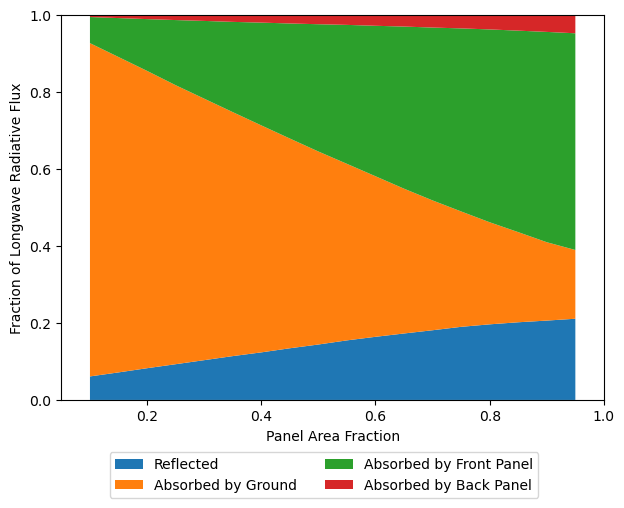

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_lwdn_panel_frac', 'absg_lwdn_panel_frac', 'absf_lwdn_panel_frac', 'absb_lwdn_panel_frac'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
  yacc += v
ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Area Fraction')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Height

In [17]:
temp = np.zeros(len(height), dtype=object)
result = xa.DataArray(
  np.zeros(len(height)), dims=['panel_hgt'], coords={'panel_hgt': height}
)
ds['refl_lwdn_panel_hgt'] = result.copy()
ds['absg_lwdn_panel_hgt'] = result.copy()
ds['absf_lwdn_panel_hgt'] = result.copy()
ds['absb_lwdn_panel_hgt'] = result.copy()
with Pool() as pool:
  for i in range(len(height)):
    args = defaults.copy()
    args['panel_height'] = height[i]
    temp[i] = pool.apply_async(doDownwardRadiation2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(height)):
  ds['refl_lwdn_panel_hgt'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_lwdn_panel_hgt'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_lwdn_panel_hgt'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_lwdn_panel_hgt'][i] = temp[i].get()['n_back'] / args['nphotons']

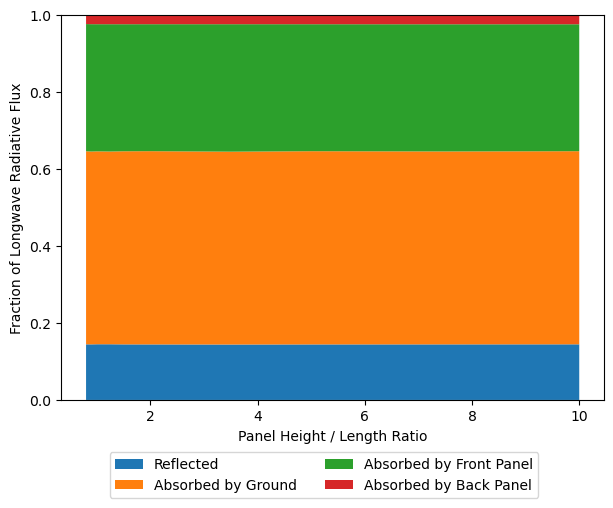

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_lwdn_panel_hgt', 'absg_lwdn_panel_hgt', 'absf_lwdn_panel_hgt', 'absb_lwdn_panel_hgt'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_hgt'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Height / Length Ratio')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Tilt Angle

In [19]:
temp = np.zeros(len(tilt), dtype=object)
result = xa.DataArray(
  np.zeros(len(tilt)), dims=['panel_angle'], coords={'panel_angle': tilt}
)
ds['refl_lwdn_panel_angle'] = result.copy()
ds['absg_lwdn_panel_angle'] = result.copy()
ds['absf_lwdn_panel_angle'] = result.copy()
ds['absb_lwdn_panel_angle'] = result.copy()
with Pool() as pool:
  for i in range(len(tilt)):
    args = defaults.copy()
    args['panel_tilt_rad'] = math.radians(tilt[i])
    temp[i] = pool.apply_async(doDownwardRadiation2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(tilt)):
  ds['refl_lwdn_panel_angle'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_lwdn_panel_angle'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_lwdn_panel_angle'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_lwdn_panel_angle'][i] = temp[i].get()['n_back'] / args['nphotons']

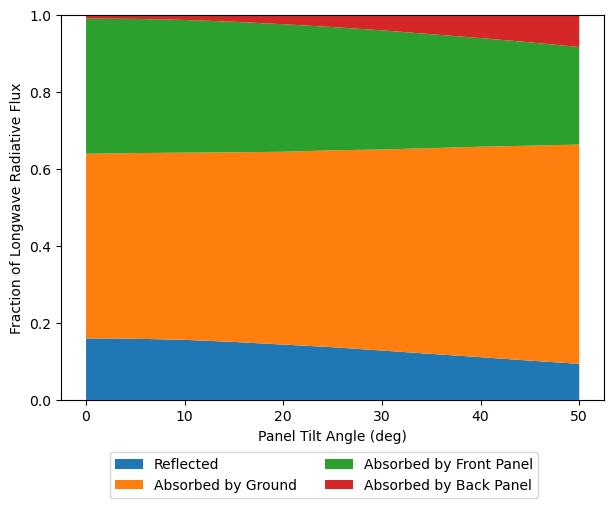

In [20]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_lwdn_panel_angle', 'absg_lwdn_panel_angle', 'absf_lwdn_panel_angle', 'absb_lwdn_panel_angle'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_angle'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Tilt Angle (deg)')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Front Panel Emissivity

In [21]:
temp = np.zeros(len(emisf), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisf)), dims=['emisf'], coords={'emisf': emisf}
)
ds['refl_lwdn_emisf'] = result.copy()
ds['absg_lwdn_emisf'] = result.copy()
ds['absf_lwdn_emisf'] = result.copy()
ds['absb_lwdn_emisf'] = result.copy()
with Pool() as pool:
  for i in range(len(emisf)):
    args = defaults.copy()
    args['albedo_front_panel'] = 1-emisf[i]
    temp[i] = pool.apply_async(doDownwardRadiation2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisf)):
  ds['refl_lwdn_emisf'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_lwdn_emisf'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_lwdn_emisf'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_lwdn_emisf'][i] = temp[i].get()['n_back'] / args['nphotons']

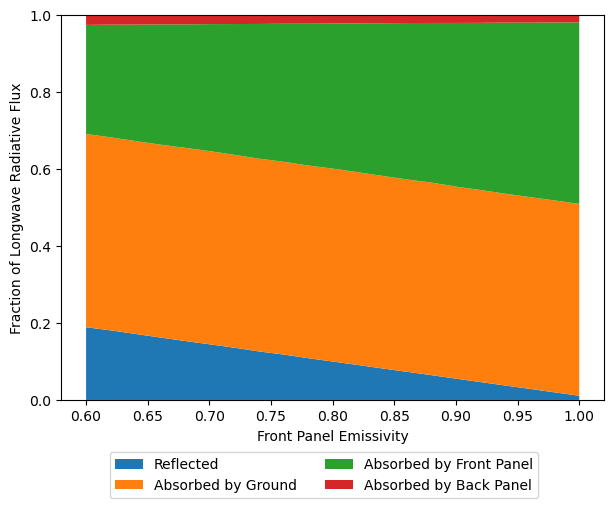

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_lwdn_emisf', 'absg_lwdn_emisf', 'absf_lwdn_emisf', 'absb_lwdn_emisf'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisf'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Front Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Back Panel Emissivity

In [23]:
temp = np.zeros(len(emisb), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisb)), dims=['emisb'], coords={'emisb': emisb}
)
ds['refl_lwdn_emisb'] = result.copy()
ds['absg_lwdn_emisb'] = result.copy()
ds['absf_lwdn_emisb'] = result.copy()
ds['absb_lwdn_emisb'] = result.copy()
with Pool() as pool:
  for i in range(len(emisb)):
    args = defaults.copy()
    args['albedo_back_panel'] = 1-emisb[i]
    temp[i] = pool.apply_async(doDownwardRadiation2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisb)):
  ds['refl_lwdn_emisb'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_lwdn_emisb'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_lwdn_emisb'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_lwdn_emisb'][i] = temp[i].get()['n_back'] / args['nphotons']

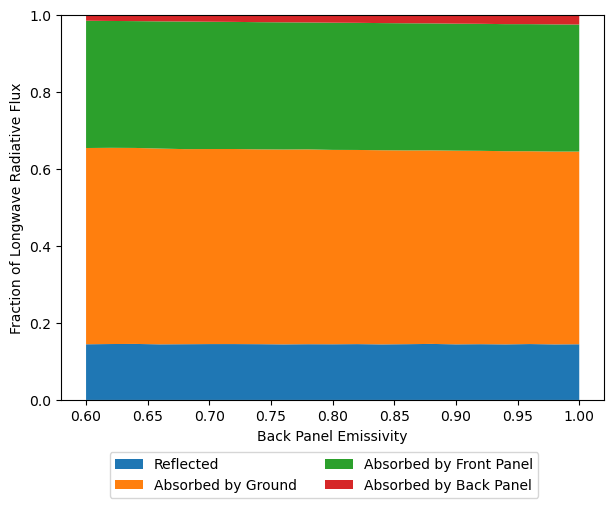

In [24]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_lwdn_emisb', 'absg_lwdn_emisb', 'absf_lwdn_emisb', 'absb_lwdn_emisb'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisb'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Back Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Ground Emissivity

In [25]:
temp = np.zeros(len(emisg), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisg)), dims=['emisg'], coords={'emisg': emisg}
)
ds['refl_lwdn_emisg'] = result.copy()
ds['absg_lwdn_emisg'] = result.copy()
ds['absf_lwdn_emisg'] = result.copy()
ds['absb_lwdn_emisg'] = result.copy()
with Pool() as pool:
  for i in range(len(emisg)):
    args = defaults.copy()
    args['albedo_ground'] = 1-emisg[i]
    temp[i] = pool.apply_async(doDownwardRadiation2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisg)):
  ds['refl_lwdn_emisg'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_lwdn_emisg'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_lwdn_emisg'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_lwdn_emisg'][i] = temp[i].get()['n_back'] / args['nphotons']

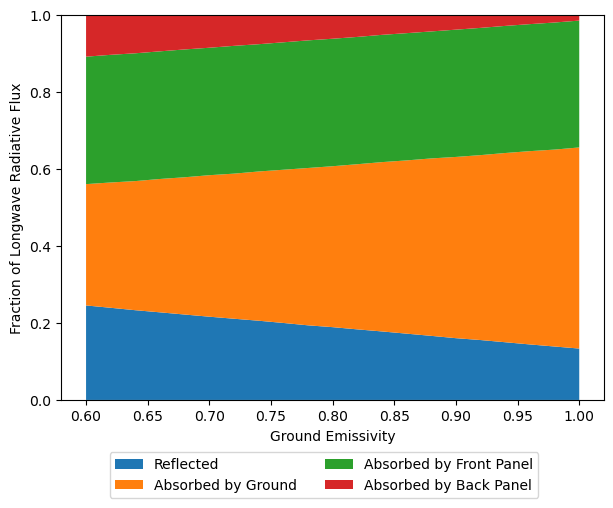

In [26]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_lwdn_emisg', 'absg_lwdn_emisg', 'absf_lwdn_emisg', 'absb_lwdn_emisg'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisg'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Ground Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

# Dependence on Input Parameters - Front Panel Emission

In [27]:
frac    = np.arange(0.1, 1.0, 0.05)
height  = np.array([0.8, 0.9, 1.0, 1.25, 1.5, 2.0, 3.5, 5.0, 7.5, 10.0])
tilt    = np.arange(0.0, 50.1, 5.0)
emisf   = np.arange(0.60, 1.01, 0.02)
emisb   = np.arange(0.60, 1.01, 0.02)
emisg   = np.arange(0.60, 1.01, 0.02)

In [28]:
defaults = {
  'nphotons': int(1e6),
  'panel_length': 1.0,
  'panel_height': 1.0,
  'scene_length': 2.0,
  'panel_tilt_rad': math.radians(20.0),
  'albedo_front_panel': 1-0.70,
  'albedo_back_panel': 1-0.96,
  'albedo_ground': 1-0.96,
  'mu0': None,
  'phi0': None,
  'emit_up': True,
  'output_hist': False,
}

In [29]:
args = defaults.copy()

## Panel Area Fraction

In [30]:
temp = np.zeros((len(frac)), dtype=object)
result = xa.DataArray(
  np.zeros(len(frac)), dims=['panel_frac'],
  coords={'panel_frac': frac}
)
ds['refl_upnl_panel_frac'] = result.copy()
ds['absg_upnl_panel_frac'] = result.copy()
ds['absf_upnl_panel_frac'] = result.copy()
ds['absb_upnl_panel_frac'] = result.copy()
with Pool() as pool:
  for i in range(len(frac)):
    args = defaults.copy()
    args['scene_length'] = 1.0 / frac[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(frac)):
  ds['refl_upnl_panel_frac'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_upnl_panel_frac'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_upnl_panel_frac'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_upnl_panel_frac'][i] = temp[i].get()['n_back'] / args['nphotons']

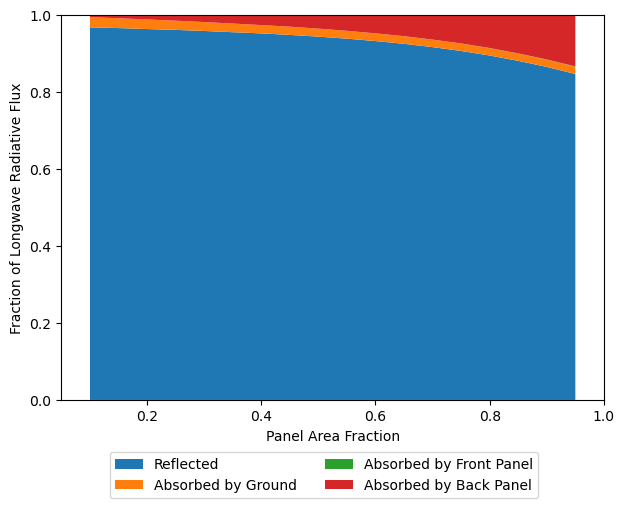

In [31]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_upnl_panel_frac', 'absg_upnl_panel_frac', 'absf_upnl_panel_frac', 'absb_upnl_panel_frac'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
  yacc += v
ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Area Fraction')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Height

In [32]:
temp = np.zeros(len(height), dtype=object)
result = xa.DataArray(
  np.zeros(len(height)), dims=['panel_hgt'], coords={'panel_hgt': height}
)
ds['refl_upnl_panel_hgt'] = result.copy()
ds['absg_upnl_panel_hgt'] = result.copy()
ds['absf_upnl_panel_hgt'] = result.copy()
ds['absb_upnl_panel_hgt'] = result.copy()
with Pool() as pool:
  for i in range(len(height)):
    args = defaults.copy()
    args['panel_height'] = height[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(height)):
  ds['refl_upnl_panel_hgt'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_upnl_panel_hgt'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_upnl_panel_hgt'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_upnl_panel_hgt'][i] = temp[i].get()['n_back'] / args['nphotons']

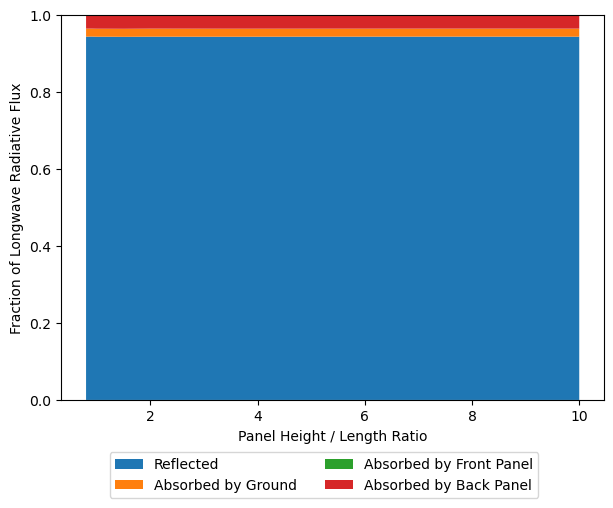

In [33]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_upnl_panel_hgt', 'absg_upnl_panel_hgt', 'absf_upnl_panel_hgt', 'absb_upnl_panel_hgt'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_hgt'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Height / Length Ratio')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Tilt Angle

In [34]:
temp = np.zeros(len(tilt), dtype=object)
result = xa.DataArray(
  np.zeros(len(tilt)), dims=['panel_angle'], coords={'panel_angle': tilt}
)
ds['refl_upnl_panel_angle'] = result.copy()
ds['absg_upnl_panel_angle'] = result.copy()
ds['absf_upnl_panel_angle'] = result.copy()
ds['absb_upnl_panel_angle'] = result.copy()
with Pool() as pool:
  for i in range(len(tilt)):
    args = defaults.copy()
    args['panel_tilt_rad'] = math.radians(tilt[i])
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(tilt)):
  ds['refl_upnl_panel_angle'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_upnl_panel_angle'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_upnl_panel_angle'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_upnl_panel_angle'][i] = temp[i].get()['n_back'] / args['nphotons']

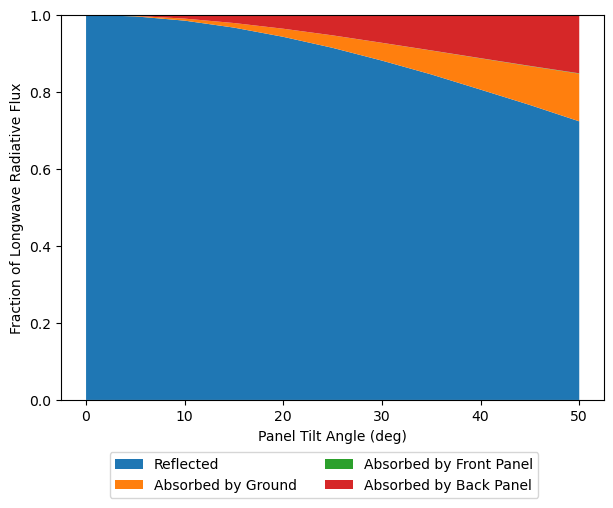

In [35]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_upnl_panel_angle', 'absg_upnl_panel_angle', 'absf_upnl_panel_angle', 'absb_upnl_panel_angle'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_angle'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Tilt Angle (deg)')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Front Panel Emissivity

In [36]:
temp = np.zeros(len(emisf), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisf)), dims=['emisf'], coords={'emisf': emisf}
)
ds['refl_upnl_emisf'] = result.copy()
ds['absg_upnl_emisf'] = result.copy()
ds['absf_upnl_emisf'] = result.copy()
ds['absb_upnl_emisf'] = result.copy()
with Pool() as pool:
  for i in range(len(emisf)):
    args = defaults.copy()
    args['albedo_front_panel'] = 1-emisf[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisf)):
  ds['refl_upnl_emisf'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_upnl_emisf'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_upnl_emisf'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_upnl_emisf'][i] = temp[i].get()['n_back'] / args['nphotons']

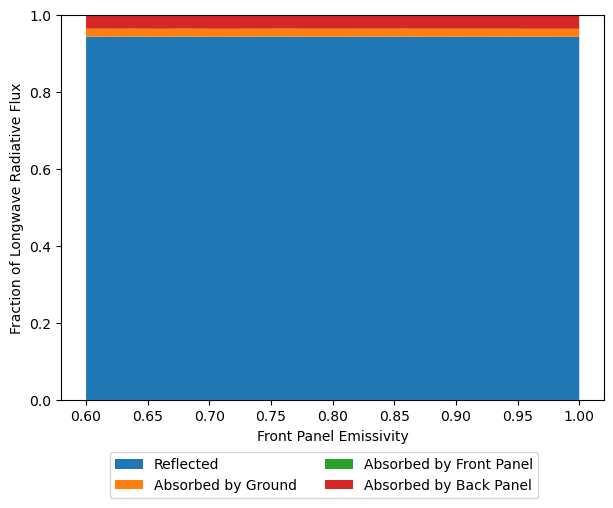

In [37]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_upnl_emisf', 'absg_upnl_emisf', 'absf_upnl_emisf', 'absb_upnl_emisf'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisf'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Front Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Back Panel Emissivity

In [38]:
temp = np.zeros(len(emisb), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisb)), dims=['emisb'], coords={'emisb': emisb}
)
ds['refl_upnl_emisb'] = result.copy()
ds['absg_upnl_emisb'] = result.copy()
ds['absf_upnl_emisb'] = result.copy()
ds['absb_upnl_emisb'] = result.copy()
with Pool() as pool:
  for i in range(len(emisb)):
    args = defaults.copy()
    args['albedo_back_panel'] = 1-emisb[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisb)):
  ds['refl_upnl_emisb'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_upnl_emisb'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_upnl_emisb'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_upnl_emisb'][i] = temp[i].get()['n_back'] / args['nphotons']

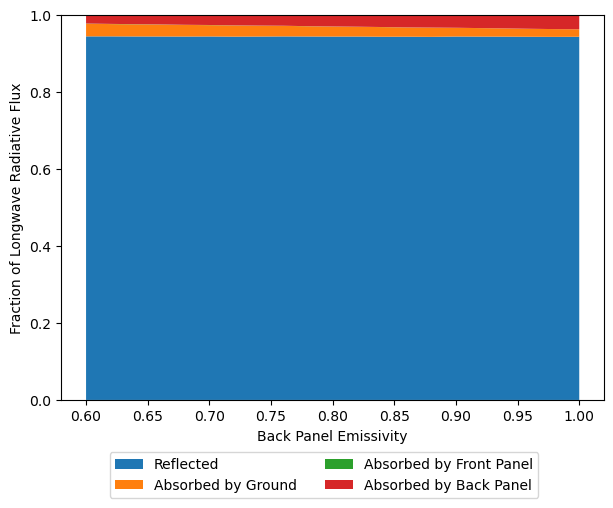

In [39]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_upnl_emisb', 'absg_upnl_emisb', 'absf_upnl_emisb', 'absb_upnl_emisb'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisb'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Back Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Ground Emissivity

In [40]:
temp = np.zeros(len(emisg), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisg)), dims=['emisg'], coords={'emisg': emisg}
)
ds['refl_upnl_emisg'] = result.copy()
ds['absg_upnl_emisg'] = result.copy()
ds['absf_upnl_emisg'] = result.copy()
ds['absb_upnl_emisg'] = result.copy()
with Pool() as pool:
  for i in range(len(emisg)):
    args = defaults.copy()
    args['albedo_ground'] = 1-emisg[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisg)):
  ds['refl_upnl_emisg'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_upnl_emisg'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_upnl_emisg'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_upnl_emisg'][i] = temp[i].get()['n_back'] / args['nphotons']

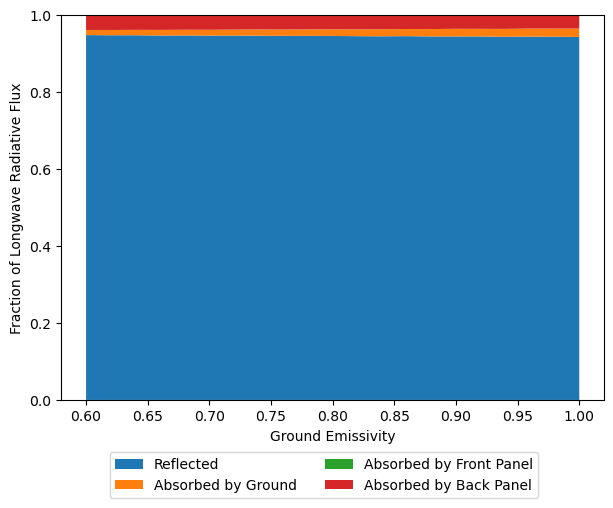

In [41]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_upnl_emisg', 'absg_upnl_emisg', 'absf_upnl_emisg', 'absb_upnl_emisg'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisg'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Ground Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

# Dependence on Input Parameters - Back Panel Emission

In [42]:
frac    = np.arange(0.1, 1.0, 0.05)
height  = np.array([0.8, 0.9, 1.0, 1.25, 1.5, 2.0, 3.5, 5.0, 7.5, 10.0])
tilt    = np.arange(0.0, 50.1, 5.0)
emisf   = np.arange(0.60, 1.01, 0.02)
emisb   = np.arange(0.60, 1.01, 0.02)
emisg   = np.arange(0.60, 1.01, 0.02)

In [43]:
defaults = {
  'nphotons': int(1e6),
  'panel_length': 1.0,
  'panel_height': 1.0,
  'scene_length': 2.0,
  'panel_tilt_rad': math.radians(20.0),
  'albedo_front_panel': 1-0.70,
  'albedo_back_panel': 1-0.96,
  'albedo_ground': 1-0.96,
  'mu0': None,
  'phi0': None,
  'emit_up': False,
  'output_hist': False,
}

In [44]:
args = defaults.copy()

## Panel Area Fraction

In [45]:
temp = np.zeros((len(frac)), dtype=object)
result = xa.DataArray(
  np.zeros(len(frac)), dims=['panel_frac'],
  coords={'panel_frac': frac}
)
ds['refl_dpnl_panel_frac'] = result.copy()
ds['absg_dpnl_panel_frac'] = result.copy()
ds['absf_dpnl_panel_frac'] = result.copy()
ds['absb_dpnl_panel_frac'] = result.copy()
with Pool() as pool:
  for i in range(len(frac)):
    args = defaults.copy()
    args['scene_length'] = 1.0 / frac[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(frac)):
  ds['refl_dpnl_panel_frac'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_dpnl_panel_frac'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_dpnl_panel_frac'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_dpnl_panel_frac'][i] = temp[i].get()['n_back'] / args['nphotons']

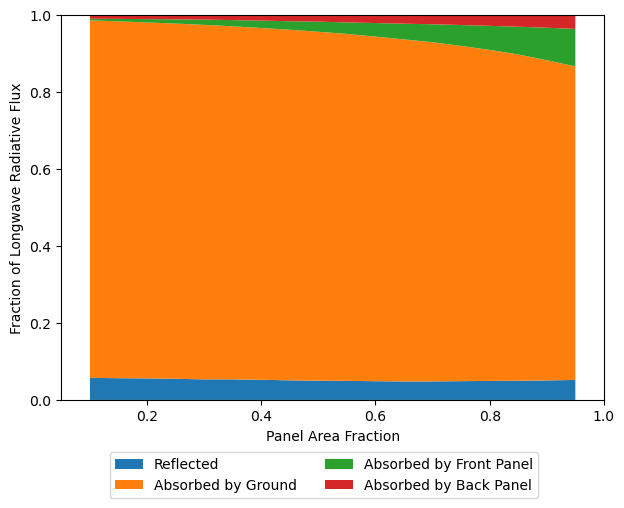

In [46]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_dpnl_panel_frac', 'absg_dpnl_panel_frac', 'absf_dpnl_panel_frac', 'absb_dpnl_panel_frac'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
  yacc += v
ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Area Fraction')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Height

In [47]:
temp = np.zeros(len(height), dtype=object)
result = xa.DataArray(
  np.zeros(len(height)), dims=['panel_hgt'], coords={'panel_hgt': height}
)
ds['refl_dpnl_panel_hgt'] = result.copy()
ds['absg_dpnl_panel_hgt'] = result.copy()
ds['absf_dpnl_panel_hgt'] = result.copy()
ds['absb_dpnl_panel_hgt'] = result.copy()
with Pool() as pool:
  for i in range(len(height)):
    args = defaults.copy()
    args['panel_height'] = height[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(height)):
  ds['refl_dpnl_panel_hgt'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_dpnl_panel_hgt'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_dpnl_panel_hgt'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_dpnl_panel_hgt'][i] = temp[i].get()['n_back'] / args['nphotons']

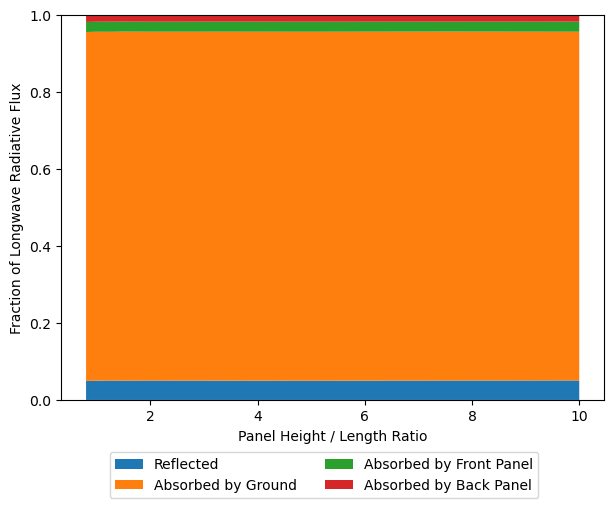

In [48]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_dpnl_panel_hgt', 'absg_dpnl_panel_hgt', 'absf_dpnl_panel_hgt', 'absb_dpnl_panel_hgt'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_hgt'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Height / Length Ratio')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Tilt Angle

In [49]:
temp = np.zeros(len(tilt), dtype=object)
result = xa.DataArray(
  np.zeros(len(tilt)), dims=['panel_angle'], coords={'panel_angle': tilt}
)
ds['refl_dpnl_panel_angle'] = result.copy()
ds['absg_dpnl_panel_angle'] = result.copy()
ds['absf_dpnl_panel_angle'] = result.copy()
ds['absb_dpnl_panel_angle'] = result.copy()
with Pool() as pool:
  for i in range(len(tilt)):
    args = defaults.copy()
    args['panel_tilt_rad'] = math.radians(tilt[i])
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(tilt)):
  ds['refl_dpnl_panel_angle'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_dpnl_panel_angle'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_dpnl_panel_angle'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_dpnl_panel_angle'][i] = temp[i].get()['n_back'] / args['nphotons']

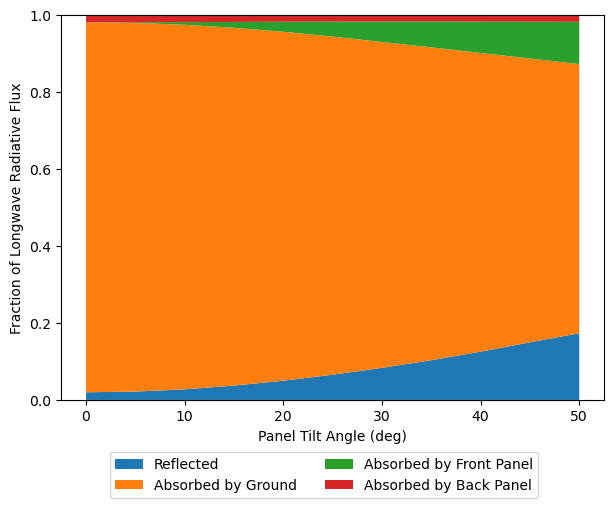

In [50]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_dpnl_panel_angle', 'absg_dpnl_panel_angle', 'absf_dpnl_panel_angle', 'absb_dpnl_panel_angle'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_angle'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Tilt Angle (deg)')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Front Panel Emissivity

In [51]:
temp = np.zeros(len(emisf), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisf)), dims=['emisf'], coords={'emisf': emisf}
)
ds['refl_dpnl_emisf'] = result.copy()
ds['absg_dpnl_emisf'] = result.copy()
ds['absf_dpnl_emisf'] = result.copy()
ds['absb_dpnl_emisf'] = result.copy()
with Pool() as pool:
  for i in range(len(emisf)):
    args = defaults.copy()
    args['albedo_front_panel'] = 1-emisf[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisf)):
  ds['refl_dpnl_emisf'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_dpnl_emisf'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_dpnl_emisf'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_dpnl_emisf'][i] = temp[i].get()['n_back'] / args['nphotons']

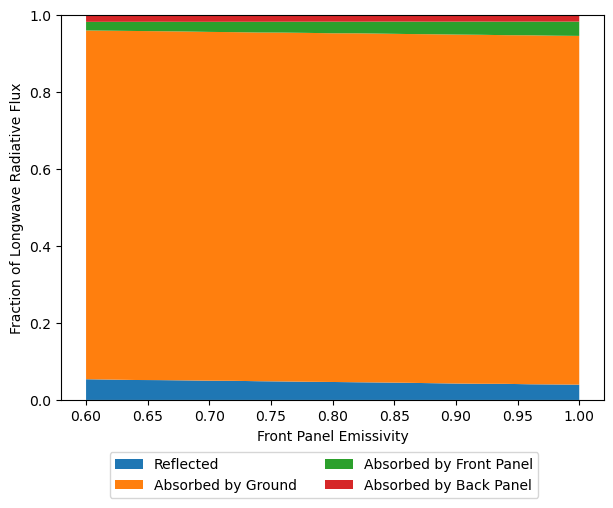

In [52]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_dpnl_emisf', 'absg_dpnl_emisf', 'absf_dpnl_emisf', 'absb_dpnl_emisf'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisf'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Front Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Back Panel Emissivity

In [53]:
temp = np.zeros(len(emisb), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisb)), dims=['emisb'], coords={'emisb': emisb}
)
ds['refl_dpnl_emisb'] = result.copy()
ds['absg_dpnl_emisb'] = result.copy()
ds['absf_dpnl_emisb'] = result.copy()
ds['absb_dpnl_emisb'] = result.copy()
with Pool() as pool:
  for i in range(len(emisb)):
    args = defaults.copy()
    args['albedo_back_panel'] = 1-emisb[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisb)):
  ds['refl_dpnl_emisb'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_dpnl_emisb'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_dpnl_emisb'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_dpnl_emisb'][i] = temp[i].get()['n_back'] / args['nphotons']

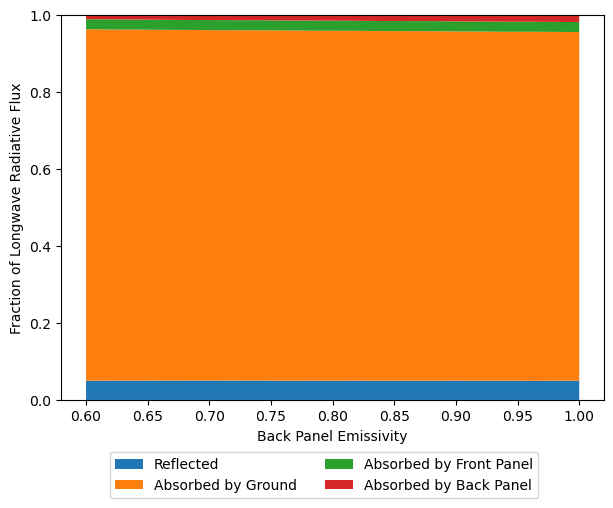

In [54]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_dpnl_emisb', 'absg_dpnl_emisb', 'absf_dpnl_emisb', 'absb_dpnl_emisb'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisb'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Back Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Ground Emissivity

In [55]:
temp = np.zeros(len(emisg), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisg)), dims=['emisg'], coords={'emisg': emisg}
)
ds['refl_dpnl_emisg'] = result.copy()
ds['absg_dpnl_emisg'] = result.copy()
ds['absf_dpnl_emisg'] = result.copy()
ds['absb_dpnl_emisg'] = result.copy()
with Pool() as pool:
  for i in range(len(emisg)):
    args = defaults.copy()
    args['albedo_ground'] = 1-emisg[i]
    temp[i] = pool.apply_async(doPanelEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisg)):
  ds['refl_dpnl_emisg'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_dpnl_emisg'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_dpnl_emisg'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_dpnl_emisg'][i] = temp[i].get()['n_back'] / args['nphotons']

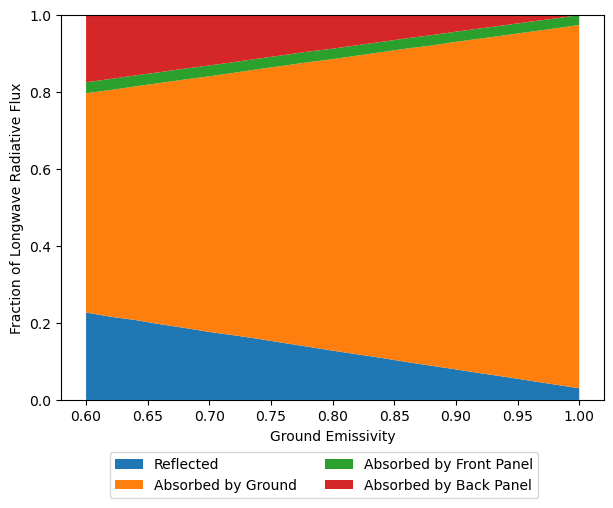

In [56]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_dpnl_emisg', 'absg_dpnl_emisg', 'absf_dpnl_emisg', 'absb_dpnl_emisg'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisg'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Ground Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

# Dependence on Input Parameters - Ground Emission

In [57]:
frac    = np.arange(0.1, 1.0, 0.05)
height  = np.array([0.8, 0.9, 1.0, 1.25, 1.5, 2.0, 3.5, 5.0, 7.5, 10.0])
tilt    = np.arange(0.0, 50.1, 5.0)
emisf   = np.arange(0.60, 1.01, 0.02)
emisb   = np.arange(0.60, 1.01, 0.02)
emisg   = np.arange(0.60, 1.01, 0.02)

In [58]:
defaults = {
  'nphotons': int(1e6),
  'panel_length': 1.0,
  'panel_height': 1.0,
  'scene_length': 2.0,
  'panel_tilt_rad': math.radians(20.0),
  'albedo_front_panel': 1-0.70,
  'albedo_back_panel': 1-0.96,
  'albedo_ground': 1-0.96,
  'mu0': None,
  'phi0': None,
  'output_hist': False,
}

In [59]:
args = defaults.copy()

## Panel Area Fraction

In [60]:
temp = np.zeros((len(frac)), dtype=object)
result = xa.DataArray(
  np.zeros(len(frac)), dims=['panel_frac'],
  coords={'panel_frac': frac}
)
ds['refl_grnd_panel_frac'] = result.copy()
ds['absg_grnd_panel_frac'] = result.copy()
ds['absf_grnd_panel_frac'] = result.copy()
ds['absb_grnd_panel_frac'] = result.copy()
with Pool() as pool:
  for i in range(len(frac)):
    args = defaults.copy()
    args['scene_length'] = 1.0 / frac[i]
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(frac)):
  ds['refl_grnd_panel_frac'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_grnd_panel_frac'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_grnd_panel_frac'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_grnd_panel_frac'][i] = temp[i].get()['n_back'] / args['nphotons']

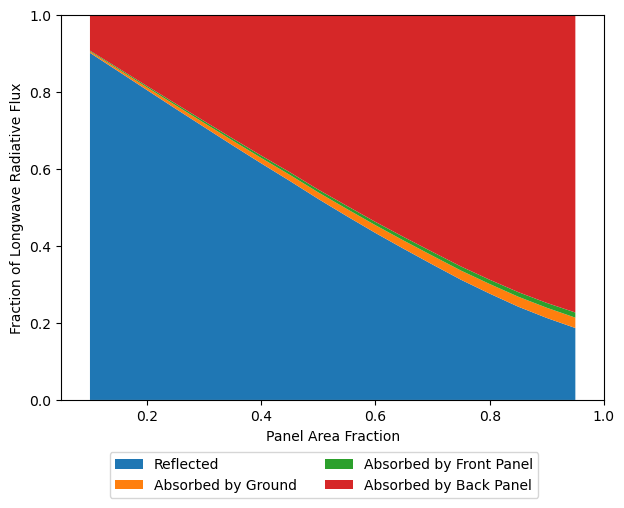

In [61]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_grnd_panel_frac', 'absg_grnd_panel_frac', 'absf_grnd_panel_frac', 'absb_grnd_panel_frac'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
  yacc += v
ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Area Fraction')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

In [62]:
ds['refl_grnd_panel_frac'].sel(panel_frac=0.5, method='nearest')

<xarray.DataArray 'refl_grnd_panel_frac' ()>
array(0.521904)
Coordinates:
    panel_frac  float64 0.5

Emitting from ground under the panels...

In [63]:
temp = np.zeros((len(frac)), dtype=object)
result = xa.DataArray(
  np.zeros(len(frac)), dims=['panel_frac'],
  coords={'panel_frac': frac}
)
refl = result.copy()
absg = result.copy()
absf = result.copy()
absb = result.copy()
with Pool() as pool:
  for i in range(len(frac)):
    args = defaults.copy()
    args['scene_length'] = 1.0 / frac[i]
    args['emit_xmin'] = 0.0
    args['emit_xmax'] = 1.0
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(frac)):
  refl[i] = temp[i].get()['n_upward'] / args['nphotons']
  absg[i] = temp[i].get()['n_ground'] / args['nphotons']
  absf[i] = temp[i].get()['n_front'] / args['nphotons']
  absb[i] = temp[i].get()['n_back'] / args['nphotons']

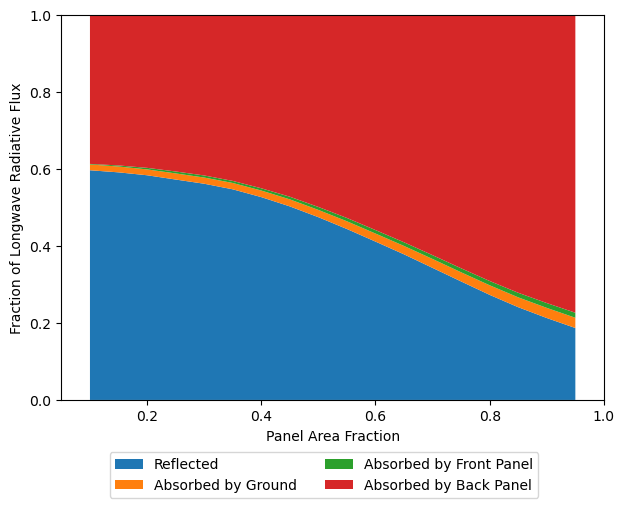

In [64]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for v, label in zip(
  (refl, absg, absf, absb),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
  yacc += v
ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Area Fraction')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

In [65]:
refl.sel(panel_frac=0.5, method='nearest')

<xarray.DataArray ()>
array(0.474698)
Coordinates:
    panel_frac  float64 0.5

Emitting from ground between solar panel arrays...

In [66]:
temp = np.zeros((len(frac)), dtype=object)
result = xa.DataArray(
  np.zeros(len(frac)), dims=['panel_frac'],
  coords={'panel_frac': frac}
)
refl = result.copy()
absg = result.copy()
absf = result.copy()
absb = result.copy()
with Pool() as pool:
  for i in range(len(frac)):
    args = defaults.copy()
    args['scene_length'] = 1.0 / frac[i]
    args['emit_xmin'] = 1.0
    args['emit_xmax'] = args['scene_length']
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(frac)):
  refl[i] = temp[i].get()['n_upward'] / args['nphotons']
  absg[i] = temp[i].get()['n_ground'] / args['nphotons']
  absf[i] = temp[i].get()['n_front'] / args['nphotons']
  absb[i] = temp[i].get()['n_back'] / args['nphotons']

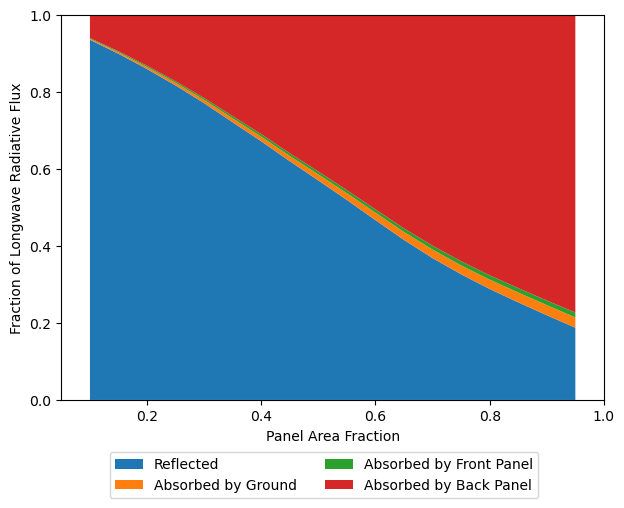

In [67]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for v, label in zip(
  (refl, absg, absf, absb),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
  yacc += v
ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Area Fraction')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

In [68]:
refl.sel(panel_frac=0.5, method='nearest')

<xarray.DataArray ()>
array(0.57016)
Coordinates:
    panel_frac  float64 0.5

## Panel Height

In [69]:
temp = np.zeros(len(height), dtype=object)
result = xa.DataArray(
  np.zeros(len(height)), dims=['panel_hgt'], coords={'panel_hgt': height}
)
ds['refl_grnd_panel_hgt'] = result.copy()
ds['absg_grnd_panel_hgt'] = result.copy()
ds['absf_grnd_panel_hgt'] = result.copy()
ds['absb_grnd_panel_hgt'] = result.copy()
with Pool() as pool:
  for i in range(len(height)):
    args = defaults.copy()
    args['panel_height'] = height[i]
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(height)):
  ds['refl_grnd_panel_hgt'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_grnd_panel_hgt'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_grnd_panel_hgt'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_grnd_panel_hgt'][i] = temp[i].get()['n_back'] / args['nphotons']

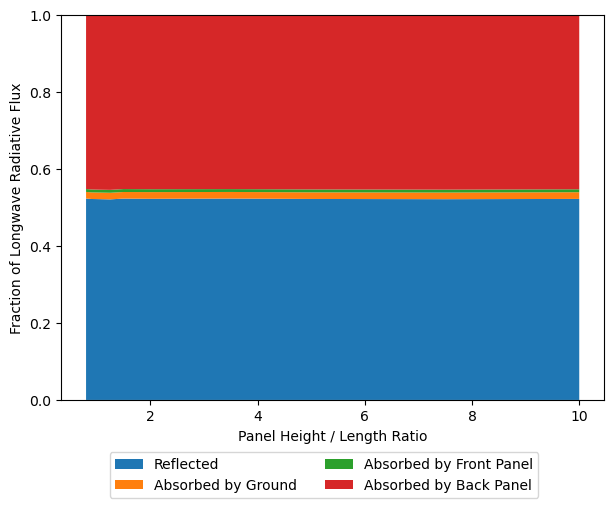

In [70]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_grnd_panel_hgt', 'absg_grnd_panel_hgt', 'absf_grnd_panel_hgt', 'absb_grnd_panel_hgt'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_hgt'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Height / Length Ratio')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Panel Tilt Angle

In [71]:
temp = np.zeros(len(tilt), dtype=object)
result = xa.DataArray(
  np.zeros(len(tilt)), dims=['panel_angle'], coords={'panel_angle': tilt}
)
ds['refl_grnd_panel_angle'] = result.copy()
ds['absg_grnd_panel_angle'] = result.copy()
ds['absf_grnd_panel_angle'] = result.copy()
ds['absb_grnd_panel_angle'] = result.copy()
with Pool() as pool:
  for i in range(len(tilt)):
    args = defaults.copy()
    args['panel_tilt_rad'] = math.radians(tilt[i])
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(tilt)):
  ds['refl_grnd_panel_angle'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_grnd_panel_angle'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_grnd_panel_angle'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_grnd_panel_angle'][i] = temp[i].get()['n_back'] / args['nphotons']

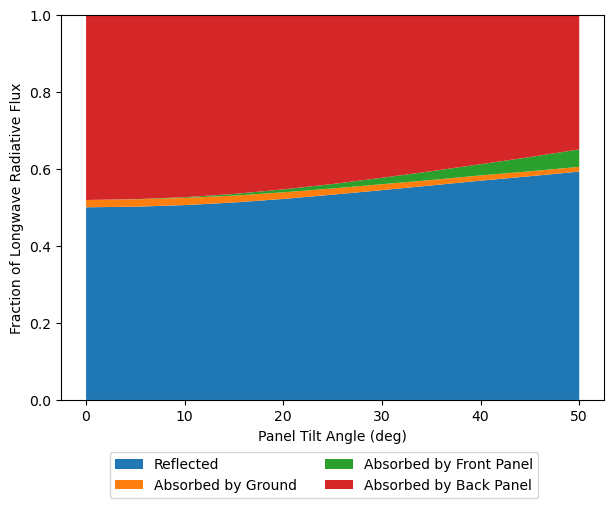

In [72]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_grnd_panel_angle', 'absg_grnd_panel_angle', 'absf_grnd_panel_angle', 'absb_grnd_panel_angle'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['panel_angle'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Panel Tilt Angle (deg)')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Front Panel Emissivity

In [73]:
temp = np.zeros(len(emisf), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisf)), dims=['emisf'], coords={'emisf': emisf}
)
ds['refl_grnd_emisf'] = result.copy()
ds['absg_grnd_emisf'] = result.copy()
ds['absf_grnd_emisf'] = result.copy()
ds['absb_grnd_emisf'] = result.copy()
with Pool() as pool:
  for i in range(len(emisf)):
    args = defaults.copy()
    args['albedo_front_panel'] = 1-emisf[i]
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisf)):
  ds['refl_grnd_emisf'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_grnd_emisf'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_grnd_emisf'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_grnd_emisf'][i] = temp[i].get()['n_back'] / args['nphotons']

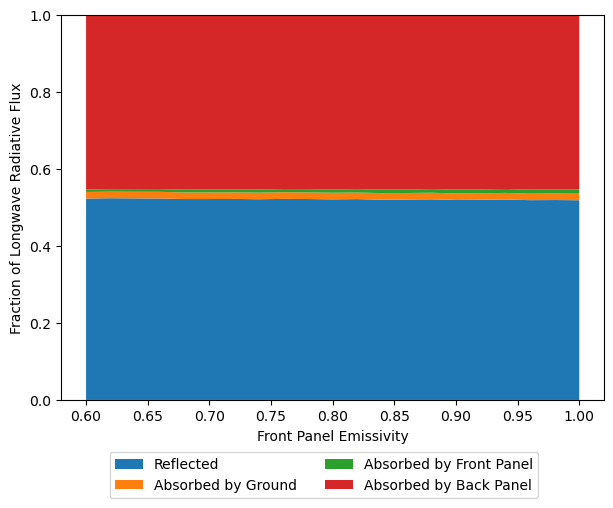

In [74]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_grnd_emisf', 'absg_grnd_emisf', 'absf_grnd_emisf', 'absb_grnd_emisf'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisf'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Front Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Back Panel Emissivity

In [75]:
temp = np.zeros(len(emisb), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisb)), dims=['emisb'], coords={'emisb': emisb}
)
ds['refl_grnd_emisb'] = result.copy()
ds['absg_grnd_emisb'] = result.copy()
ds['absf_grnd_emisb'] = result.copy()
ds['absb_grnd_emisb'] = result.copy()
with Pool() as pool:
  for i in range(len(emisb)):
    args = defaults.copy()
    args['albedo_back_panel'] = 1-emisb[i]
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisb)):
  ds['refl_grnd_emisb'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_grnd_emisb'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_grnd_emisb'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_grnd_emisb'][i] = temp[i].get()['n_back'] / args['nphotons']

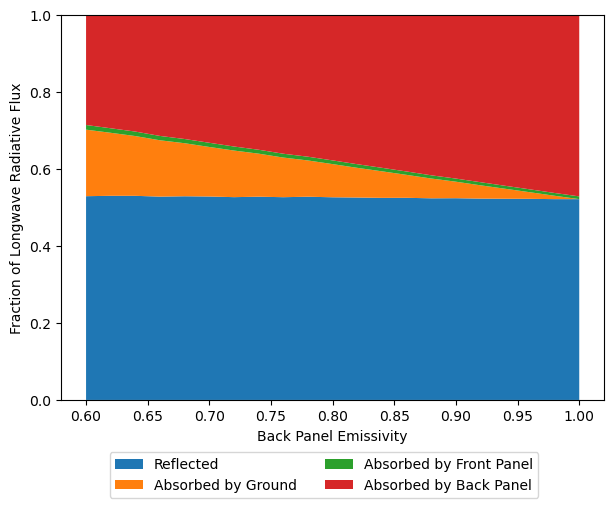

In [76]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_grnd_emisb', 'absg_grnd_emisb', 'absf_grnd_emisb', 'absb_grnd_emisb'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisb'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Back Panel Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

## Ground Emissivity

In [77]:
temp = np.zeros(len(emisg), dtype=object)
result = xa.DataArray(
  np.zeros(len(emisg)), dims=['emisg'], coords={'emisg': emisg}
)
ds['refl_grnd_emisg'] = result.copy()
ds['absg_grnd_emisg'] = result.copy()
ds['absf_grnd_emisg'] = result.copy()
ds['absb_grnd_emisg'] = result.copy()
with Pool() as pool:
  for i in range(len(emisg)):
    args = defaults.copy()
    args['albedo_ground'] = 1-emisg[i]
    temp[i] = pool.apply_async(doGroundEmission2D, kwds=args)
  pool.close()
  pool.join()

for i in range(len(emisg)):
  ds['refl_grnd_emisg'][i] = temp[i].get()['n_upward'] / args['nphotons']
  ds['absg_grnd_emisg'][i] = temp[i].get()['n_ground'] / args['nphotons']
  ds['absf_grnd_emisg'][i] = temp[i].get()['n_front'] / args['nphotons']
  ds['absb_grnd_emisg'][i] = temp[i].get()['n_back'] / args['nphotons']

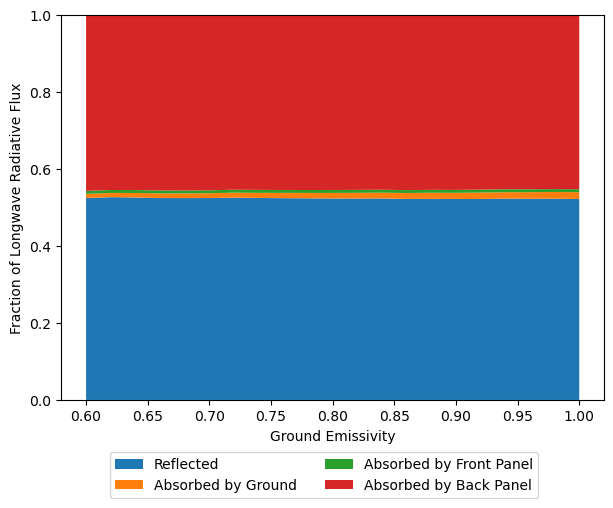

In [78]:
fig, ax = plt.subplots(figsize=(7,5))
yacc = None
for tbl, label in zip(
  ('refl_grnd_emisg', 'absg_grnd_emisg', 'absf_grnd_emisg', 'absb_grnd_emisg'),
  ('Reflected', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
):
  v = ds[tbl]
  if yacc is None:
    yacc = np.zeros(len(v))
  ax.fill_between(v['emisg'], yacc, yacc+v, label=label)
  yacc += v
# ax.set_xlim(0.05, 1.00)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel('Ground Emissivity')
ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.0, -0.10, 1.0, 0.05))

# Save Data

In [79]:
ds

<xarray.Dataset>
Dimensions:                (panel_frac: 18, panel_hgt: 10, panel_angle: 11,
                            emisf: 21, emisb: 21, emisg: 21)
Coordinates:
  * panel_frac             (panel_frac) float64 0.1 0.15 0.2 ... 0.85 0.9 0.95
  * panel_hgt              (panel_hgt) float64 0.8 0.9 1.0 1.25 ... 5.0 7.5 10.0
  * panel_angle            (panel_angle) float64 0.0 5.0 10.0 ... 40.0 45.0 50.0
  * emisf                  (emisf) float64 0.6 0.62 0.64 0.66 ... 0.96 0.98 1.0
  * emisb                  (emisb) float64 0.6 0.62 0.64 0.66 ... 0.96 0.98 1.0
  * emisg                  (emisg) float64 0.6 0.62 0.64 0.66 ... 0.96 0.98 1.0
Data variables: (12/96)
    refl_lwdn_panel_frac   (panel_frac) float64 0.06109 0.07155 ... 0.2109
    absg_lwdn_panel_frac   (panel_frac) float64 0.8657 0.8192 ... 0.2035 0.1786
    absf_lwdn_panel_frac   (panel_frac) float64 0.06781 0.1011 ... 0.5463 0.5628
    absb_lwdn_panel_frac   (panel_frac) float64 0.005431 0.008124 ... 0.04763
    refl_lwdn_panel_hgt    (panel_hgt) float64 0.1445 0.1444 ... 0.1444 0.1445
    absg_lwdn_panel_hgt    (panel_hgt) float64 0.5016 0.5008 ... 0.5011 0.5016
    ...                     ...
    absf_grnd_emisb        (emisb) float64 0.01211 0.01174 ... 0.007262 0.007099
    absb_grnd_emisb        (emisb) float64 0.2858 0.2944 ... 0.4624 0.4713
    refl_grnd_emisg        (emisg) float64 0.5246 0.5266 0.526 ... 0.5228 0.5218
    absg_grnd_emisg        (emisg) float64 0.01067 0.01106 ... 0.0174 0.01792
    absf_grnd_emisg        (emisg) float64 0.007638 0.007648 ... 0.007665
    absb_grnd_emisg        (emisg) float64 0.4571 0.4547 ... 0.4524 0.4526

In [80]:
ds.to_netcdf(DATA_PATH)

# Figures in Manuscript

## Figure 5

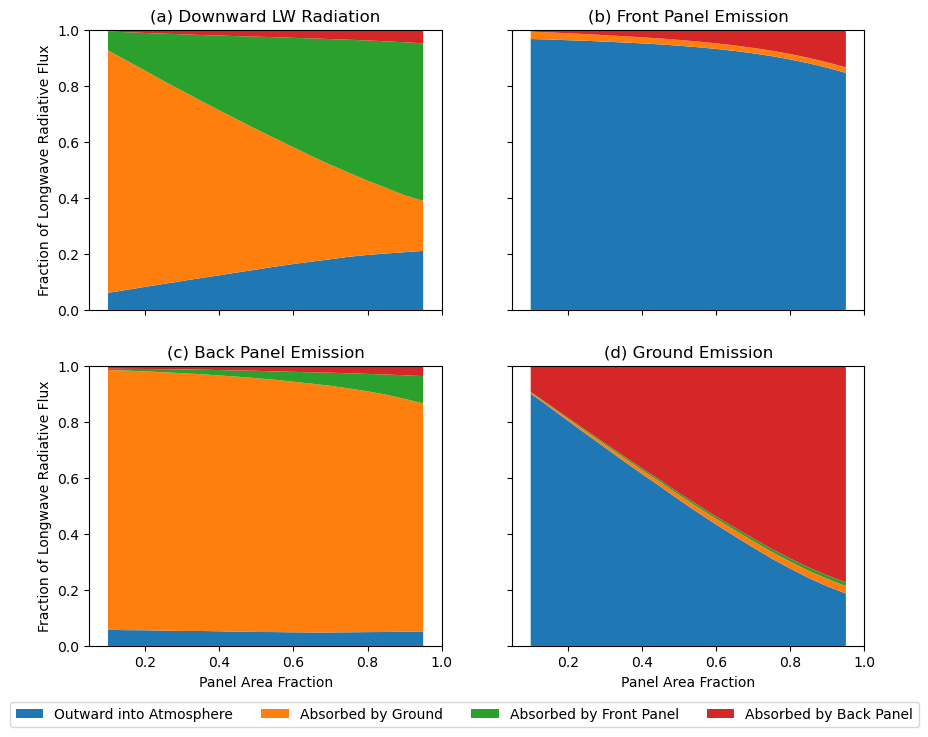

In [81]:
fig, axs = plt.subplots(2,2,figsize=(10,8),sharex=True,sharey=True)

for src, title, ax in zip(
  ('lwdn', 'upnl', 'dpnl', 'grnd'),
  ('(a) Downward LW Radiation', '(b) Front Panel Emission', '(c) Back Panel Emission', '(d) Ground Emission'),
  axs.flat
):
  tables = (
    f'refl_{src}_panel_frac', f'absg_{src}_panel_frac',
    f'absf_{src}_panel_frac', f'absb_{src}_panel_frac'
  )
  yacc = None
  for tbl, label in zip(
    tables,
    ('Outward into Atmosphere', 'Absorbed by Ground', 'Absorbed by Front Panel', 'Absorbed by Back Panel')
  ):
    v = ds[tbl]
    if yacc is None:
      yacc = np.zeros(len(v))
    ax.fill_between(v['panel_frac'], yacc, yacc+v, label=label)
    yacc += v
  ax.set_title(title)
axs[0,0].set_xlim(0.05, 1.00)
axs[0,0].set_ylim(0.0, 1.0)
for ax in axs[1,:]:
  ax.set_xlabel('Panel Area Fraction')
for ax in axs[:,0]:
  ax.set_ylabel('Fraction of Longwave Radiative Flux')

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.0, 0.0, 1.0, 0.05))

## Figure 6: Impact on Outgoing LW Flux

Test

In [82]:
weights = np.full(4, np.nan)
for i, src in enumerate(('lwdn', 'upnl', 'dpnl', 'grnd')):
  weights[i] = ds[f'refl_{src}_panel_frac'].sel(panel_frac=0.5, method='nearest').values
weights

array([0.144   , 0.943654, 0.049925, 0.521904])

In [83]:
t_ground = np.arange(270, 301, 2)
dt_panel = 0
dt_lwdn = np.arange(-20.0, 1.1, 1.0)
t_lwdn = t_ground + dt_lwdn[:,np.newaxis]
t_lwdn.shape

(22, 16)

In [84]:
lwup0 = (1-defaults['albedo_ground']) * STEFAN_CONSTANT * t_ground**4 + defaults['albedo_ground'] * STEFAN_CONSTANT * t_lwdn**4
lwup0.shape

(22, 16)

In [85]:
lwup1 = np.full_like(lwup0, np.nan)
for i in range(len(dt_lwdn)):
  for j in range(len(t_ground)):
    fluxsrc = np.array([
      STEFAN_CONSTANT * t_lwdn[i,j]**4,
      defaults['panel_length'] / defaults['scene_length'] * STEFAN_CONSTANT * (1-defaults['albedo_front_panel']) * (t_ground[j] + dt_panel)**4,
      defaults['panel_length'] / defaults['scene_length'] * STEFAN_CONSTANT * (1-defaults['albedo_back_panel']) * (t_ground[j] + dt_panel)**4,
      STEFAN_CONSTANT * (1-defaults['albedo_ground']) * t_ground[j]**4
    ])
    lwup1[i,j] = (weights * fluxsrc).sum()

Text(0.5, 1.0, '$dT_{panel}=0; dT_{ground}=0$')

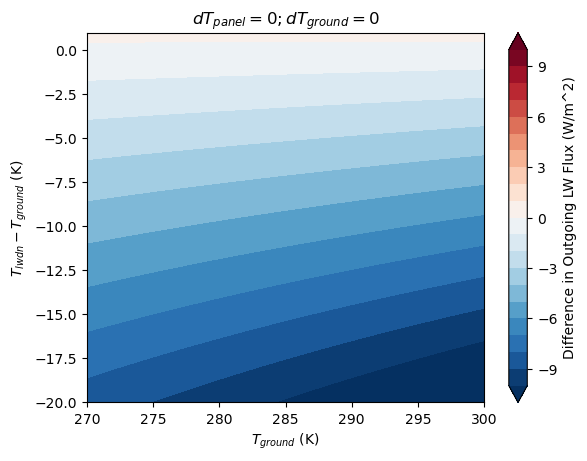

In [86]:
plt.contourf(t_ground, dt_lwdn, lwup1 - lwup0, extend='both',
             levels=np.arange(-10, 11, 1), cmap='RdBu_r')
cb = plt.colorbar()
cb.set_label('Difference in Outgoing LW Flux (W/m^2)')
plt.xlabel('$T_{ground}$ (K)')
plt.ylabel('$T_{lwdn} - T_{ground}$ (K)')
plt.title('$dT_{panel}=0; dT_{ground}=0$')

Interactive Figure

In [87]:
def f4(dt_panel:float, dt_ground:float):
  weights = np.full(4, np.nan)
  for i, src in enumerate(('lwdn', 'upnl', 'dpnl', 'grnd')):
    weights[i] = ds[f'refl_{src}_panel_frac'].sel(panel_frac=0.5, method='nearest').values
  
  t_ground = np.arange(270, 321, 2)
  dt_lwdn = np.arange(-20.0, 1.1, 1.0)
  t_lwdn = t_ground + dt_lwdn[:,np.newaxis]

  lwup0 = (
    (1-defaults['albedo_ground']) * STEFAN_CONSTANT * t_ground**4
    + defaults['albedo_ground'] * STEFAN_CONSTANT * t_lwdn**4
  )
  lwup1 = np.full_like(lwup0, np.nan)
  for i in range(len(dt_lwdn)):
    for j in range(len(t_ground)):
      fluxsrc = np.array([
        STEFAN_CONSTANT * t_lwdn[i,j]**4,
        defaults['panel_length'] / defaults['scene_length'] * STEFAN_CONSTANT * (1-defaults['albedo_front_panel']) * (t_ground[j] + dt_ground)**4,
        defaults['panel_length'] / defaults['scene_length'] * STEFAN_CONSTANT * (1-defaults['albedo_back_panel']) * (t_ground[j] + dt_ground)**4,
        STEFAN_CONSTANT * (1-defaults['albedo_ground']) * (t_ground[j] + dt_panel)**4
      ])
      lwup1[i,j] = (weights * fluxsrc).sum()
  
  plt.contourf(t_ground, dt_lwdn, lwup1 - lwup0, levels=11,
               cmap='RdBu_r', norm=colors.CenteredNorm(vcenter=0))
  cb = plt.colorbar()
  cb.set_label('Difference in Outgoing LW Flux ($W/m^2$)')
  plt.xlabel('$T_{ground}$ (K)')
  plt.ylabel('$T_{lwdn} - T_{ground}$ (K)')
  plt.title(f'$dT_{{panel}}={dt_panel:.1f} K; dT_{{ground}}={dt_ground:.1f} K$')

In [88]:
wigTPanel = widgets.FloatSlider(value=0.0, min=-20.0, max=20.0, step=0.1, description='dT_{panel}')
wigTGround = widgets.FloatSlider(value=0.0, min=-20.0, max=20.0, step=0.1, description='dT_{ground}')
vbox = widgets.VBox([wigTPanel, wigTGround])
out = widgets.interactive_output(f4, {'dt_panel': wigTPanel, 'dt_ground': wigTGround})
out.layout.height = '350px'
display(vbox, out)

Output(layout=Layout(height='350px'))

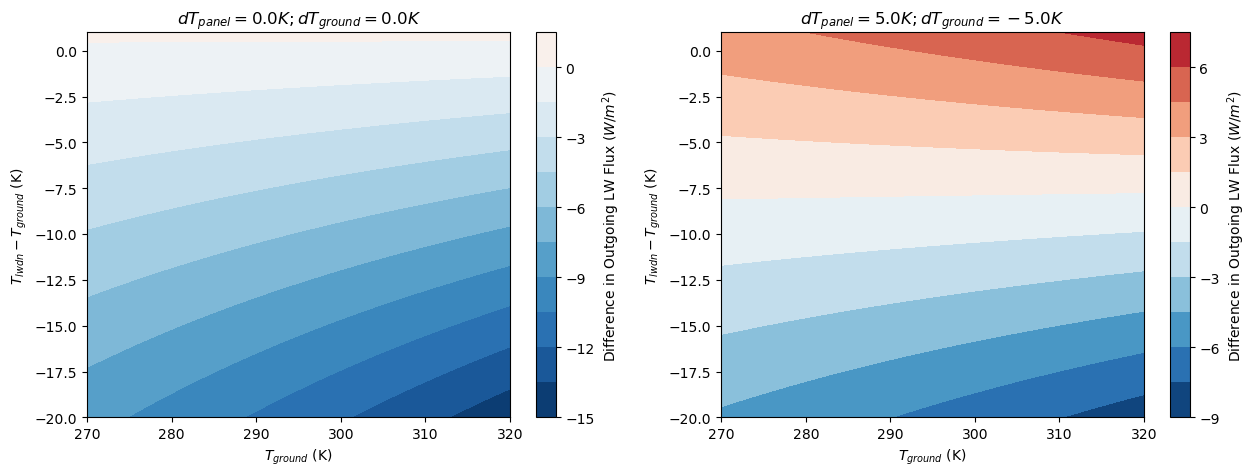

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
f4(0.0, 0.0)
plt.subplot(1,2,2)
f4(5.0, -5.0)

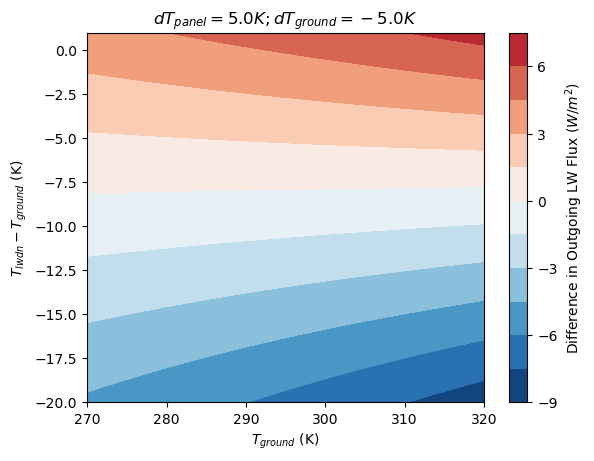

In [90]:
f4(5, -5)

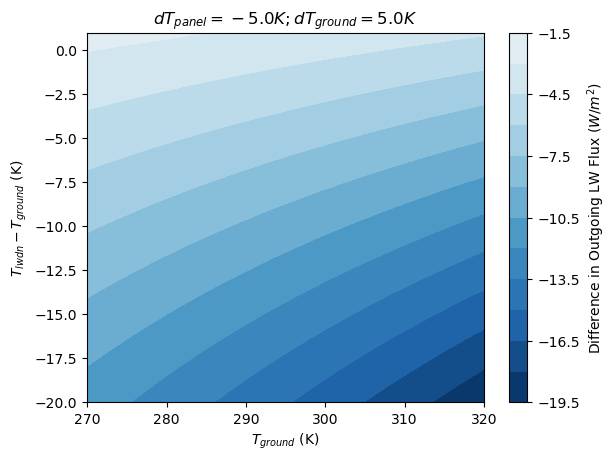

In [91]:
f4(-5, 5)